In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("../data-processing/processed_training_ori.csv")
test = pd.read_csv("../data-processing/processed_testing_ori.csv")

all_data = pd.concat([train, test], axis=0, ignore_index=True)

In [8]:
all_data['salary-1500'].describe()

count    14715.000000
mean         5.418009
std          2.691589
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         16.000000
Name: salary-1500, dtype: float64

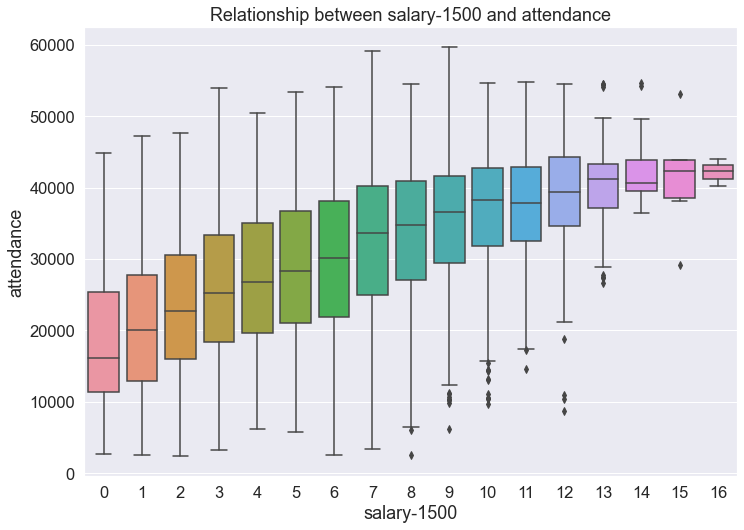

In [9]:
# plot relationship between salary-1500 and attendance
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

ax = sns.boxplot(x="salary-1500",y = "attendance", data=all_data)
ax.set_title("Relationship between salary-1500 and attendance")
plt.show()

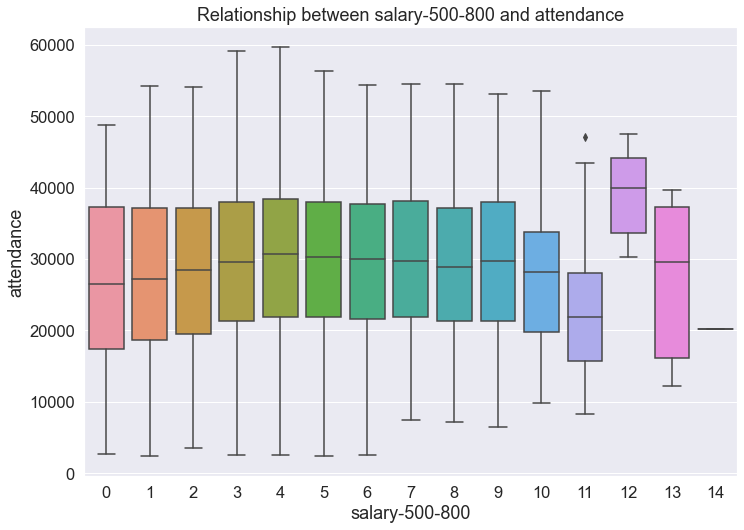

In [10]:
# plot relationship between salary-500-800 and attendance
ax = sns.boxplot(x="salary-500-800",y = "attendance", data=all_data)
ax.set_title("Relationship between salary-500-800 and attendance")
plt.show()

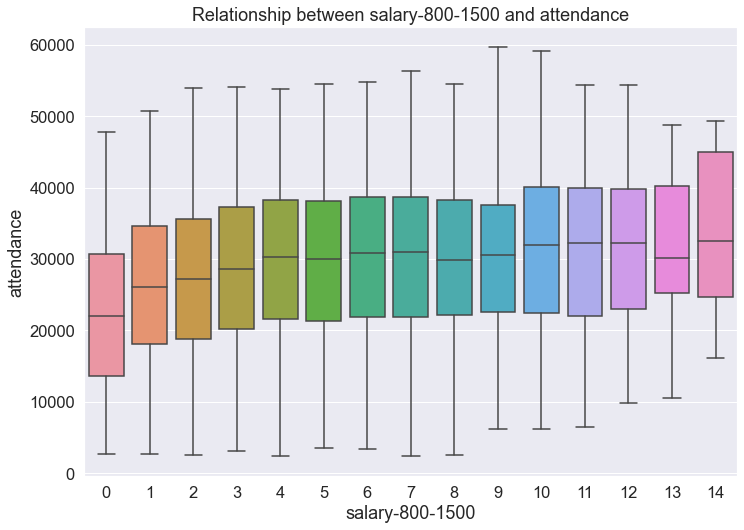

In [11]:
# plot relationship between salary-800-1500 and attendance
ax = sns.boxplot(x="salary-800-1500",y = "attendance", data=all_data)
ax.set_title("Relationship between salary-800-1500 and attendance")
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

In [4]:
train_w_pre_5_10 = pd.read_csv("../models-v2-lle/trainset_w_lle.csv")
test_w_pre_5_10 = pd.read_csv("../models-v2-lle/testset_w_lle.csv")

all_data_w_pre_5_10 = pd.concat([train_w_pre_5_10, test_w_pre_5_10], axis=0, ignore_index=True)

In [6]:
all_data_w_pre_5_10.head(10)

,attendance,is_federal_holiday,venue,on_grass,temperature,wind_speed,team1_name,team1_pre_win,team1_pre_loss,team1_pre_win_pct,...,start_hour,start_hour_label_afternoon,start_hour_label_evening,start_hour_label_night,start_hour_label_noon,game_page_url,start_time,previous_5_to_10MA,lle1,lle2
0,35055,0,Wrigley Field,1,-2.786672,-0.093090,STL,-1.62645,-1.654514,0.0,...,19,0,1,0,0,https://www.baseball-reference.com/boxes/CHN/C...,2015-04-05 19:17:00,32742.135802,0.007683,0.000329
1,45030,0,Comerica Park,1,-2.031671,-0.489072,MIN,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/DET/D...,2015-04-06 13:08:00,36014.925926,0.008566,0.006095
2,45909,0,Safeco Field,1,-1.842921,-1.281036,LAA,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/SEA/S...,2015-04-06 13:12:00,25485.604938,0.003695,0.009393
3,53518,0,Dodger Stadium,1,-0.804795,-1.281036,SDP,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/LAN/L...,2015-04-06 13:12:00,46695.518519,0.007517,0.002310
4,48469,0,Yankee Stadium III,1,-1.842921,-0.489072,TOR,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/NYA/N...,2015-04-06 13:13:00,42520.300000,0.006798,-0.005155
5,46032,0,Miller Park,1,-0.332920,-1.479027,COL,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/MIL/M...,2015-04-06 13:20:00,34535.604938,0.005108,0.018398
6,45549,0,Citizens Bank Park,1,-0.238545,0.698874,BOS,-1.62645,-1.654514,0.0,...,15,1,0,0,0,https://www.baseball-reference.com/boxes/PHI/P...,2015-04-06 15:08:00,29924.098765,0.004066,0.002808
7,31042,0,Tropicana Field,0,-0.144170,-1.479027,BAL,-1.62645,-1.654514,0.0,...,15,1,0,0,0,https://www.baseball-reference.com/boxes/TBA/T...,2015-04-06 15:12:00,17857.580247,0.006434,0.003062
8,40085,0,Kauffman Stadium,1,-1.371046,-0.291081,CHW,-1.62645,-1.654514,0.0,...,15,1,0,0,0,https://www.baseball-reference.com/boxes/KCA/K...,2015-04-06 15:14:00,24154.098765,0.008615,0.001770
9,42295,0,Nationals Park,1,0.233330,1.292848,NYM,-1.62645,-1.654514,0.0,...,16,1,0,0,0,https://www.baseball-reference.com/boxes/WAS/W...,2015-04-06 16:09:00,31844.308642,0.013469,-0.010330


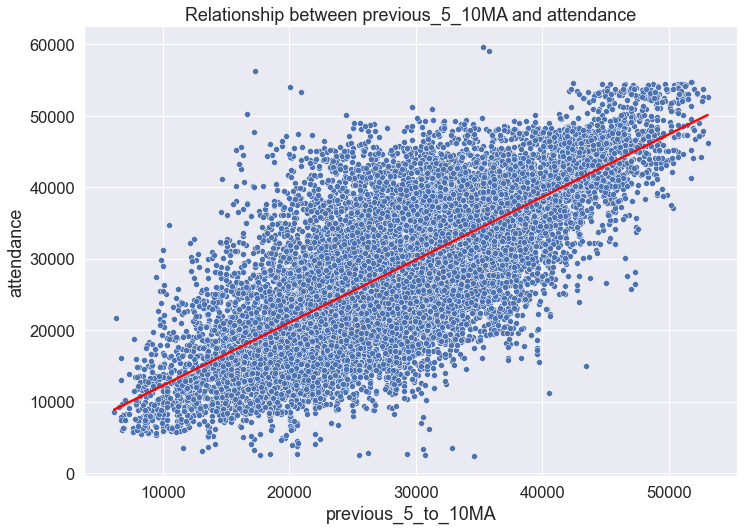

In [11]:
# plot relationship between previous_5_10MA and attendance
ax = sns.scatterplot(x="previous_5_to_10MA",y = "attendance", data=all_data_w_pre_5_10)
# draw regression line
sns.regplot(x="previous_5_to_10MA",y = "attendance", data=all_data_w_pre_5_10, scatter=False, color="red")
ax.set_title("Relationship between previous_5_10MA and attendance")
plt.show()

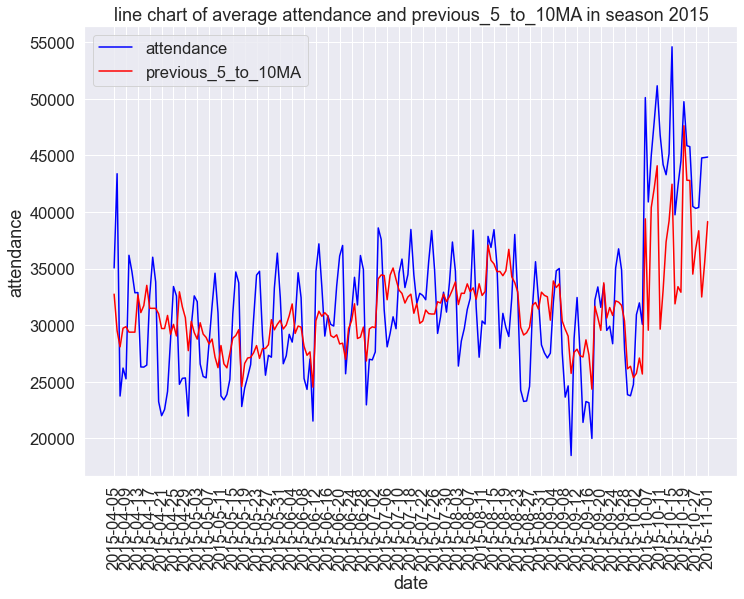

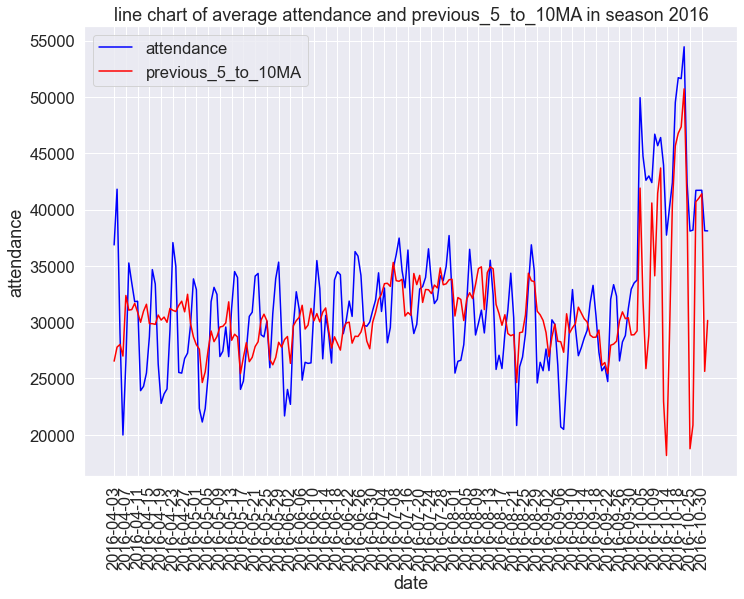

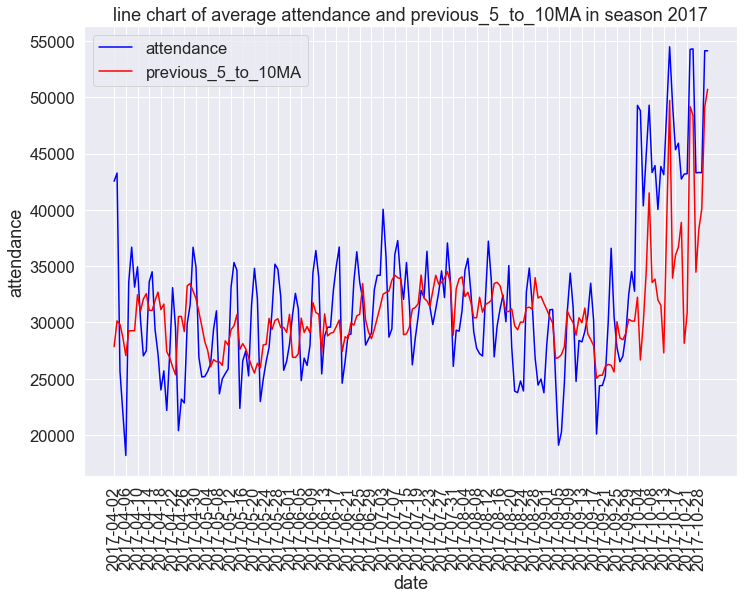

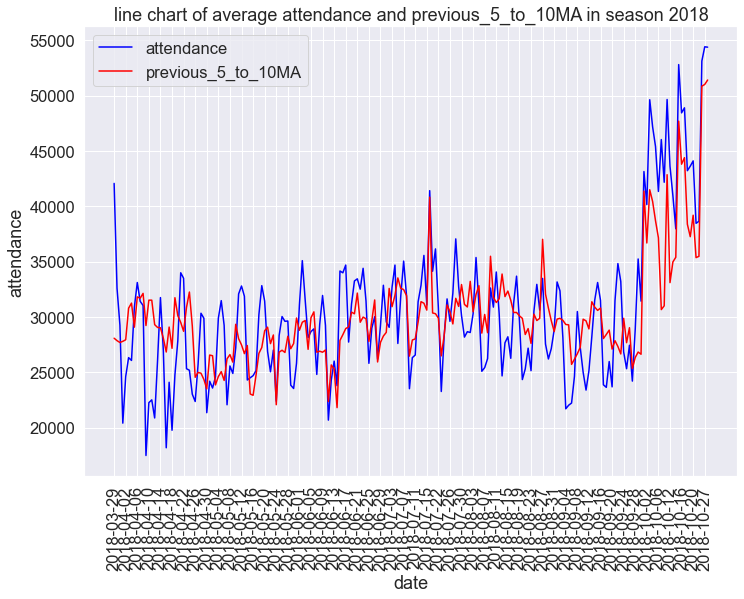

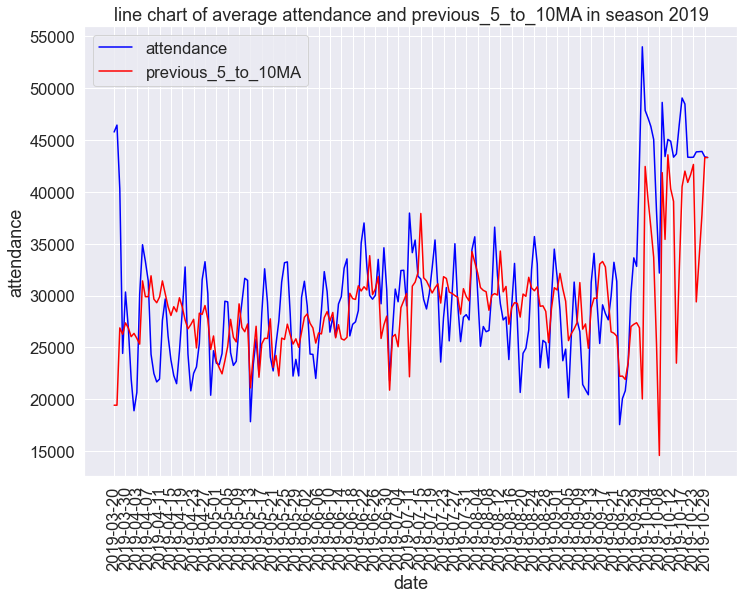

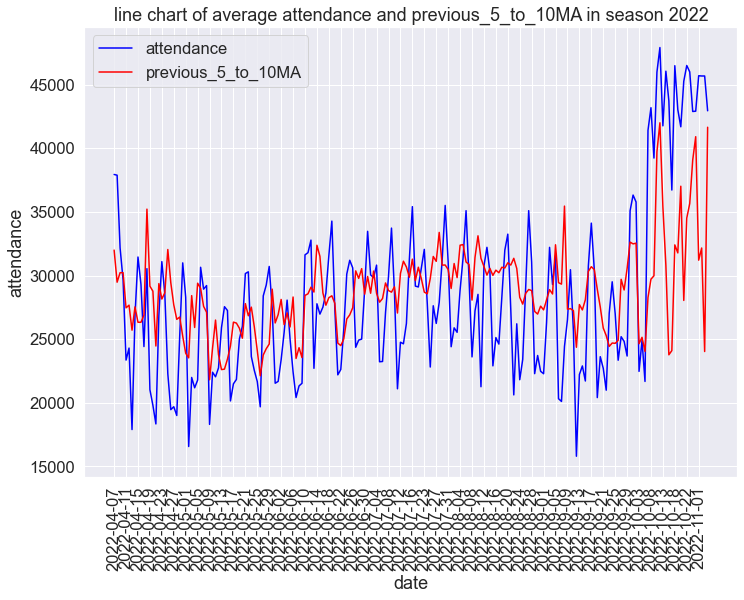

In [19]:
# for every season, draw line chart of attendance and previous_5_to_10MA
pd.options.mode.chained_assignment = None
seasons = all_data_w_pre_5_10['season'].unique()
for season in seasons:
    # we calculate every day's average attendance and previous_5_to_10MA
    season_data = all_data_w_pre_5_10[all_data_w_pre_5_10['season'] == season]
    # start_time column is in format of "2015-10-27 00:00:00", we only need the date
    season_data['start_time'] = season_data['start_time'].apply(lambda x: x.split(' ')[0])
    season_data = season_data.groupby('start_time').mean()
    season_data = season_data.reset_index()
    # plot line chart
    ax = sns.lineplot(x="start_time",y = "attendance", data=season_data, color="blue")
    ax = sns.lineplot(x="start_time",y = "previous_5_to_10MA", data=season_data, color="red")
    ax.set_title(f"line chart of average attendance and previous_5_to_10MA in season {season}")
    # set x axis label vertical
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    # increase x interval
    ax.set_xticks(ax.get_xticks()[::4])
    # set legend
    ax.legend(['attendance', 'previous_5_to_10MA'])
    # set x axis label
    ax.set_xlabel("date")
    # set y axis label
    ax.set_ylabel("attendance")
    plt.show()

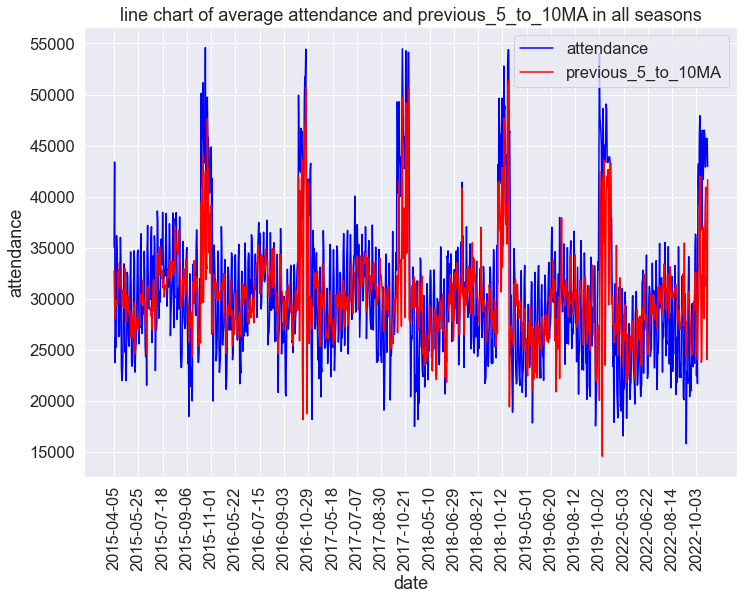

In [24]:
# groupby date and calculate average attendance and previous_5_to_10MA for all seasons
all_data_w_pre_5_10['start_time'] = all_data_w_pre_5_10['start_time'].apply(lambda x: x.split(' ')[0])
all_data_w_pre_5_10 = all_data_w_pre_5_10.groupby('start_time').mean()
all_data_w_pre_5_10 = all_data_w_pre_5_10.reset_index()
# plot line chart
ax = sns.lineplot(x="start_time",y = "attendance", data=all_data_w_pre_5_10, color="blue")
ax = sns.lineplot(x="start_time",y = "previous_5_to_10MA", data=all_data_w_pre_5_10, color="red")
ax.set_title(f"line chart of average attendance and previous_5_to_10MA in all seasons")
# set x axis label vertical
for item in ax.get_xticklabels():
    item.set_rotation(90)
# increase x interval
ax.set_xticks(ax.get_xticks()[::50])
# set legend
ax.legend(['attendance', 'previous_5_to_10MA'])
# set x axis label
ax.set_xlabel("date")
# set y axis label
ax.set_ylabel("attendance")
plt.show()

In [25]:
# calculate correlation between previous_5_to_10MA and attendance
corr = all_data_w_pre_5_10['previous_5_to_10MA'].corr(all_data_w_pre_5_10['attendance'])
print(f"correlation betwee previous_5_to_10MA and attendance is {corr}")

correlation betwee previous_5_to_10MA and attendance is 0.6361285668783949
